# The Movies Dataset
Identifying similar movies based on movie characteristics

https://www.kaggle.com/rounakbanik/the-movies-dataset

## Context
These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

## Content
This dataset consists of the following files:

**movies_metadata.csv:** The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.


Our goal is to identify similar movies based on movie characteristics.

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
#credits = pd.read_csv('Desktop/DS Projects/the-movies-dataset/credits.csv')
#keywords = pd.read_csv('Desktop/DS Projects/the-movies-dataset/keywords.csv')
#links = pd.read_csv('Desktop/DS Projects/the-movies-dataset/links.csv')
df = pd.read_csv('Desktop/DS Projects/the-movies-dataset/movies_metadata.csv')
#ratings = pd.read_csv('Desktop/DS Projects/the-movies-dataset/ratings.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [210]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


That's too many different 'production_companies'.

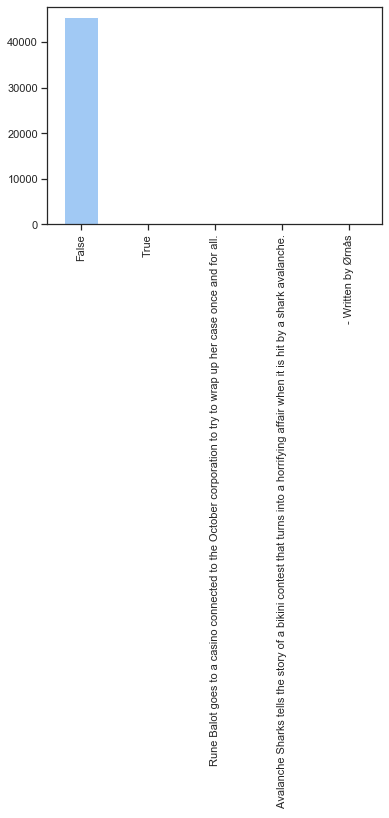

In [211]:
df['adult'].value_counts().plot(kind='bar')

We will just delete it.

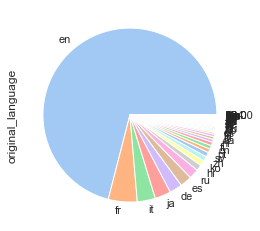

In [212]:
df['original_language'].value_counts().plot(kind = 'pie')

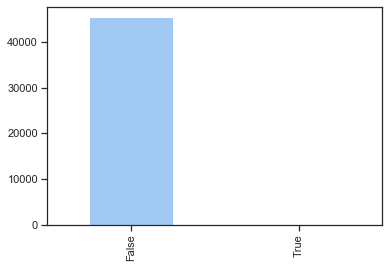

In [213]:
df['video'].value_counts().plot(kind = 'bar')

i'm going to delete: adult, belongs_to_collection, homepage, tagline, status

In [214]:
df.drop(['adult', 'belongs_to_collection', 'production_companies', 'production_countries', 'homepage', 'tagline', 'status', 'original_title', 'spoken_languages', 'original_title', 'id', 'imdb_id', 'poster_path'], axis=1,inplace=True)

In [215]:
#df['genres'] = df['genres'].apply(lambda x: x.replace('[]','NaN'))
#df['production_companies'] = df['production_companies'].apply(lambda x: x.replace('[]','NaN'))
#df['production_countries'] = df['production_countries'].apply(lambda x: x.replace('[]','NaN'))

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 12 columns):
budget               45466 non-null object
genres               45466 non-null object
original_language    45455 non-null object
overview             44512 non-null object
popularity           45461 non-null object
release_date         45379 non-null object
revenue              45460 non-null float64
runtime              45203 non-null float64
title                45460 non-null object
video                45460 non-null object
vote_average         45460 non-null float64
vote_count           45460 non-null float64
dtypes: float64(4), object(8)
memory usage: 4.2+ MB


In [217]:
df.isnull().sum()*100/df.isnull().count()

budget               0.000000
genres               0.000000
original_language    0.024194
overview             2.098271
popularity           0.010997
release_date         0.191352
revenue              0.013197
runtime              0.578454
title                0.013197
video                0.013197
vote_average         0.013197
vote_count           0.013197
dtype: float64

In [218]:
df.columns

Index(['budget', 'genres', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'title', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

Now I will do some feature engineering. I'm goin to transform some columns.

In [219]:
type(df.genres[1])

str

I can see my columns are strings. So at first I will convert it to list

In [220]:
df.genres[1]

"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]"

In [221]:
import ast 
# converting our string to list
def convert_to_list(string):
    for row_index, row in df.iterrows():
        df.at[row_index, string] = ast.literal_eval(row[string])

In [222]:
convert_to_list('genres')

In [223]:
print(type(df.genres[45])) 

<class 'list'>


In [224]:
print(type(df.genres[45][0])) 

<class 'dict'>


Now I will get rid of dictonaries 

In [225]:
genres1 = []
for row_index, row in df['genres'].iteritems():
    genres = []
    for i in row:
        
        names = i['name']
        genres.append(names)
   
    genres1.append(genres)
df.insert(0, "genres1", genres1, True) 

In [226]:
df.head(2)

,genres1,budget,genres,original_language,overview,popularity,release_date,revenue,runtime,title,video,vote_average,vote_count
0,"[Animation, Comedy, Family]",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.9469,1995-10-30,373554033.0,81.0,Toy Story,False,7.7,5415.0
1,"[Adventure, Fantasy, Family]",65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.0155,1995-12-15,262797249.0,104.0,Jumanji,False,6.9,2413.0


I don't need "genres" column anymore

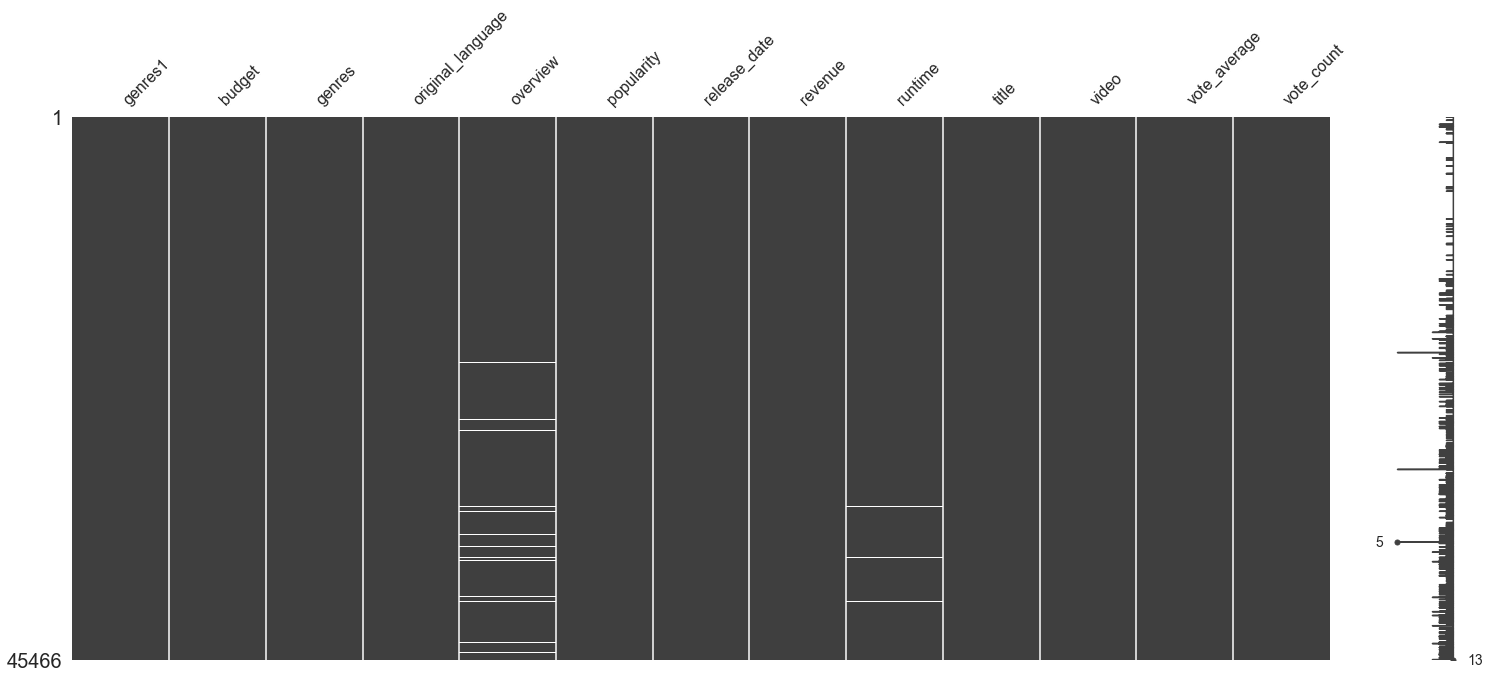

In [227]:
import missingno as msno
#missing values
df.isnull().sum()*100/df.isnull().count()

# Create nullity matrix for missing values 

msno.matrix(df)

I have no much missing values. So I will just delete them

In [228]:
df.dropna(axis=0,  inplace=True)

Now Let's convert 'release_date' to 'year'

In [229]:
from datetime import datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')
df['year']= pd.to_datetime(df['release_date'], format='%Y-%m-%d').dt.year

In [230]:
df.drop(['release_date', 'genres'], axis=1,inplace=True)

Now I will use tricky way to mark a movie's genre. Since the movie can have 1 to 3 genres it's not easy to apply encoding. So I will create columns for each genre and mark 0 or 1 if a movie has that genre. And I need to create temp df for that and modeling.

In [231]:
df.head()

,genres1,budget,original_language,overview,popularity,revenue,runtime,title,video,vote_average,vote_count,year
0,"[Animation, Comedy, Family]",30000000,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,373554033.0,81.0,Toy Story,False,7.7,5415.0,1995
1,"[Adventure, Fantasy, Family]",65000000,en,When siblings Judy and Peter discover an encha...,17.0155,262797249.0,104.0,Jumanji,False,6.9,2413.0,1995
2,"[Romance, Comedy]",0,en,A family wedding reignites the ancient feud be...,11.7129,0.0,101.0,Grumpier Old Men,False,6.5,92.0,1995
3,"[Comedy, Drama, Romance]",16000000,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,81452156.0,127.0,Waiting to Exhale,False,6.1,34.0,1995
4,[Comedy],0,en,Just when George Banks has recovered from his ...,8.38752,76578911.0,106.0,Father of the Bride Part II,False,5.7,173.0,1995


# Creating a list with all genres we have
list_of_genres = []
for row in df['genres']:
    for i in row:
        names = i['name']
        if names in list_of_genres:
            pass
        else:
            list_of_genres.append(names)
        


In [232]:
# Creating a list with all genres we have
list_of_genres = []
for row in df['genres1']:
    for i in row:
        if i in list_of_genres:
            pass
        else:
            list_of_genres.append(i)

In [233]:
len(list_of_genres)

20

In [234]:
list_of_genres

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'History',
 'Science Fiction',
 'Mystery',
 'War',
 'Foreign',
 'Music',
 'Documentary',
 'Western',
 'TV Movie']

In [235]:
df_temp = df.copy()

In [236]:
g = globals() 
for i in range(0, 32): 
    g['genre_{0}'.format(i)] = []

In [237]:
for k, genre in enumerate(list_of_genres):
    for row in df_temp['genres1']:
        temp_list = 0
        for i in row:
            if i == genre:
            
                temp_list += 1
            
            else:
                temp_list += 0
        if temp_list == 0:
            g['genre_{}'.format(k)].append(0)
        else:
            g['genre_{}'.format(k)].append(1)

In [238]:
for k, genre in enumerate(list_of_genres):
    df_temp[genre]=g['genre_{}'.format(k)]

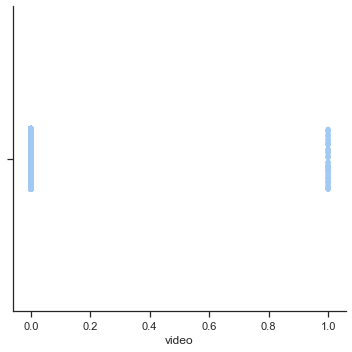

In [239]:
import seaborn as sns
sns.catplot(x="video", data=df_temp);

not using: 'genres', 'overview', 'title', , 'release_date', ,
one-hot encoding: 'video'
label encoding: 'original_language', 'year', 'production_companies', 'production_countries'
using: 'popularity','revenue', 'runtime', 'vote_average', 'vote_count'
      'video'

In [240]:
df_temp.shape

(44425, 32)

# Data Encoding

In [241]:
from sklearn import preprocessing 

In [242]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'country'. 
df_temp['original_language']= label_encoder.fit_transform(df_temp['original_language']) 
df_temp['year']= label_encoder.fit_transform(df_temp['year']) 

In [243]:
df_temp["video"] = pd.get_dummies(df_temp["video"], prefix="video", drop_first=True)

In [244]:
df_temp.head()

,genres1,budget,original_language,overview,popularity,revenue,runtime,title,video,vote_average,...,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
0,"[Animation, Comedy, Family]",30000000,17,"Led by Woody, Andy's toys live happily in his ...",21.9469,373554033.0,81.0,Toy Story,0,7.7,...,0,0,0,0,0,0,0,0,0,0
1,"[Adventure, Fantasy, Family]",65000000,17,When siblings Judy and Peter discover an encha...,17.0155,262797249.0,104.0,Jumanji,0,6.9,...,0,0,0,0,0,0,0,0,0,0
2,"[Romance, Comedy]",0,17,A family wedding reignites the ancient feud be...,11.7129,0.0,101.0,Grumpier Old Men,0,6.5,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama, Romance]",16000000,17,"Cheated on, mistreated and stepped on, the wom...",3.85949,81452156.0,127.0,Waiting to Exhale,0,6.1,...,0,0,0,0,0,0,0,0,0,0
4,[Comedy],0,17,Just when George Banks has recovered from his ...,8.38752,76578911.0,106.0,Father of the Bride Part II,0,5.7,...,0,0,0,0,0,0,0,0,0,0


In [245]:
df_temp.shape

(44425, 32)

# Phase 1: Unsupervized Learning

In [246]:
X = df_temp.drop([ 'overview', 'title', 'genres1'], axis=1)

In [247]:
X

,budget,original_language,popularity,revenue,runtime,video,vote_average,vote_count,year,Animation,...,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
0,30000000,17,21.9469,373554033.0,81.0,0,7.7,5415.0,110,1,...,0,0,0,0,0,0,0,0,0,0
1,65000000,17,17.0155,262797249.0,104.0,0,6.9,2413.0,110,0,...,0,0,0,0,0,0,0,0,0,0
2,0,17,11.7129,0.0,101.0,0,6.5,92.0,110,0,...,0,0,0,0,0,0,0,0,0,0
3,16000000,17,3.85949,81452156.0,127.0,0,6.1,34.0,110,0,...,0,0,0,0,0,0,0,0,0,0
4,0,17,8.38752,76578911.0,106.0,0,5.7,173.0,110,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,0,17,5.683753,0.0,104.0,0,5.7,26.0,106,0,...,0,0,0,0,0,0,0,0,0,0
45462,0,79,0.178241,0.0,360.0,0,9.0,3.0,126,0,...,0,0,0,0,0,0,0,0,0,0
45463,0,17,0.903007,0.0,90.0,0,3.8,6.0,118,0,...,0,0,0,0,0,0,0,0,0,0
45464,0,17,0.003503,0.0,87.0,0,0.0,0.0,32,0,...,0,0,0,0,0,0,0,0,0,0


### 1) Standartizing Data

In [248]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [249]:
X_std

array([[ 1.45801504, -0.38488511,  3.12920589, ..., -0.30904207,
        -0.15436912, -0.1310431 ],
       [ 3.44510105, -0.38488511,  2.3157489 , ..., -0.30904207,
        -0.15436912, -0.1310431 ],
       [-0.24520155, -0.38488511,  1.44105505, ..., -0.30904207,
        -0.15436912, -0.1310431 ],
       ...,
       [-0.24520155, -0.38488511, -0.34208481, ..., -0.30904207,
        -0.15436912, -0.1310431 ],
       [-0.24520155, -0.38488511, -0.49046199, ..., -0.30904207,
        -0.15436912, -0.1310431 ],
       [-0.24520155, -0.38488511, -0.46414978, ..., -0.30904207,
        -0.15436912, -0.1310431 ]])

In [250]:
X_std = pd.DataFrame(X_std, columns = X.columns)

In [251]:
X_std.shape

(44425, 29)

In [252]:
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth,SpectralClustering,AffinityPropagation

### 1. Clustering with K-Means

Recall that in K-Means Clustering we want to maximize the distance between centroids and minimize the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

## Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against K. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned.

SS=∑k∑xi∈Ck∑xj∈Ck(xi−xj)2=∑k∑xi∈Ck(xi−μk)2
where xi is a point, Ck represents cluster k and μk is the centroid for cluster k. We can plot SS vs. K and choose the elbow point in the plot as the best value for K. The elbow point is the point at which the plot starts descending much more slowly.

In [253]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [254]:
score = [kmeans[i].fit(X_std).score(X_std) for i in range(len(kmeans))]

In [255]:
import pylab as pl

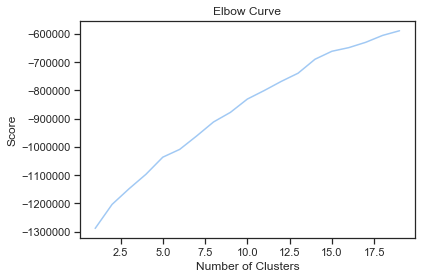

In [256]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

there isn't really a clear inflection point.

In [257]:
X_mm = preprocessing.MinMaxScaler().fit_transform(X)

In [258]:
X_mm = pd.DataFrame(X_mm, columns = X.columns)

In [259]:
X_mm.shape

(44425, 29)

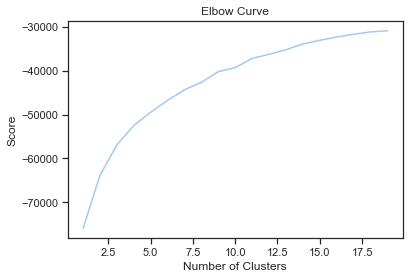

In [260]:
score = [kmeans[i].fit(X_mm).score(X_mm) for i in range(len(kmeans))]
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Let's start with 2 cluster and will move up to 8

In [261]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

## Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint xi "fits" its assigned cluster and also how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote axi as the average distance from xi to all other points within its own cluster k. The lower the value, the better. On the other hand bxi is the minimum average distance from xi to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from xi to the points within that cluster, and then take the minimum. The silhouette s(xi) is defined as

s(xi)=bxi−aximax(axi,bxi)
The silhouette score is computed on every datapoint in every cluster. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

Range	Interpretation
0.71 - 1.0	A strong structure has been found.
0.51 - 0.7	A reasonable structure has been found.
0.26 - 0.5	The structure is weak and could be artificial.
< 0.25	No substantial structure has been found.

Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

For n_clusters=2, The Silhouette Coefficient is 0.1744021751394249


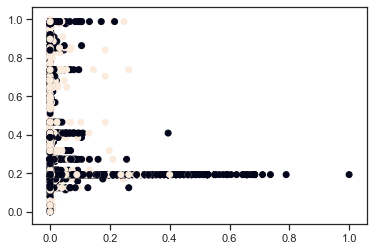

For n_clusters=3, The Silhouette Coefficient is 0.18800521321981323


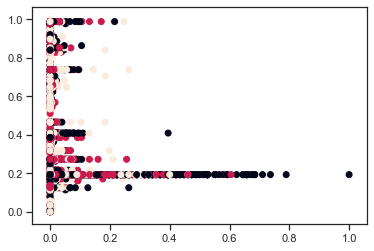

For n_clusters=4, The Silhouette Coefficient is 0.20074655327309857


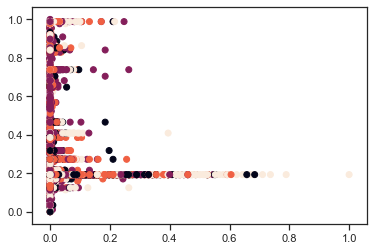

For n_clusters=5, The Silhouette Coefficient is 0.19908231650798236


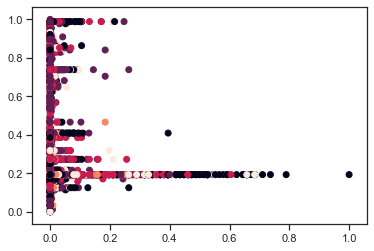

For n_clusters=6, The Silhouette Coefficient is 0.21000467478409562


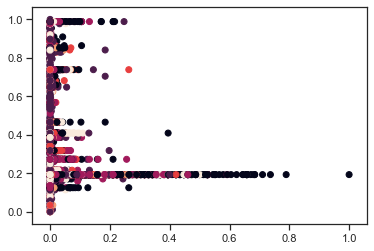

For n_clusters=7, The Silhouette Coefficient is 0.20455852296081514


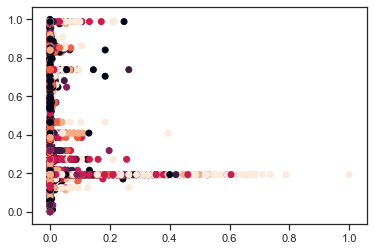

In [262]:
for n_cluster in range(2, 8):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_mm)
    y_pred = KMeans(n_clusters=n_cluster).fit_predict(X_mm)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_mm, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    plt.scatter(X_mm.iloc[:, 0], X_mm.iloc[:, 1], c=y_pred)
    plt.show()

We'll go with this: For n_clusters=8, The Silhouette Coefficient is 0.21110259852334343

In [263]:
kmeans8 = KMeans(n_clusters=8).fit(X_mm)
y_pred8 = KMeans(n_clusters=8).fit_predict(X_mm)
label5 = kmeans.labels_
df['cluster'] = kmeans8.labels_

In [264]:
df.head()


,genres1,budget,original_language,overview,popularity,revenue,runtime,title,video,vote_average,vote_count,year,cluster
0,"[Animation, Comedy, Family]",30000000,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,373554033.0,81.0,Toy Story,False,7.7,5415.0,1995,1
1,"[Adventure, Fantasy, Family]",65000000,en,When siblings Judy and Peter discover an encha...,17.0155,262797249.0,104.0,Jumanji,False,6.9,2413.0,1995,3
2,"[Romance, Comedy]",0,en,A family wedding reignites the ancient feud be...,11.7129,0.0,101.0,Grumpier Old Men,False,6.5,92.0,1995,1
3,"[Comedy, Drama, Romance]",16000000,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,81452156.0,127.0,Waiting to Exhale,False,6.1,34.0,1995,7
4,[Comedy],0,en,Just when George Banks has recovered from his ...,8.38752,76578911.0,106.0,Father of the Bride Part II,False,5.7,173.0,1995,1


## Mean-shift

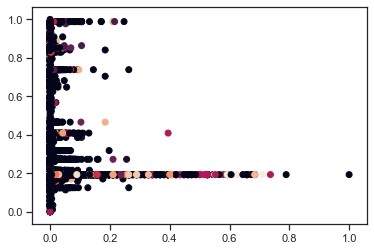

Number of estimated clusters: 32
For n_clusters=7, The Silhouette Coefficient is 0.20455852296081514


In [265]:
bandwidth = estimate_bandwidth(X_mm, quantile=0.1, n_samples=200)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs= 2)
ms.fit(X_mm)
ms_pred = ms.fit_predict(X_mm)
# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))
plt.scatter(X_mm.iloc[:, 0], X_mm.iloc[:, 1], c=labels)
plt.show()
print("Number of estimated clusters: {}".format(n_clusters_))

sil_coeff = silhouette_score(X_mm, label, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))


# Important
Below I was trying to run 2 more clustering methods, but the run time was too long to wait (more than 3 hours).

# Affinity propagation

In [ ]:
af = AffinityPropagation().fit(X_mm)
print('Done')

### Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
sil_coeff = silhouette_score(X_PCA_std, labels, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

In [ ]:
plt.figure(1)
plt.clf()

### Cycle through each cluster and graph them with a center point for the
### exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_mm[cluster_centers_indices[k]]
    plt.plot(X_PCA_std[class_members, 0], X_PCA_std[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# Spectral clustering

In [ ]:
#for n_cluster in range(2, 5):

### Declare and fit the model.
sc = SpectralClustering(n_clusters=8)
sc.fit(X_mm)

#Predicted clusters.
predict=sc.fit_predict(X_mm)
sil_coeff = silhouette_score(X_mm, predict, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(8, sil_coeff))
#Graph results.
plt.scatter(X_mm.iloc[:, 0], X_mm.iloc[:, 1], c=predict)
plt.show()

# Exploring clusters

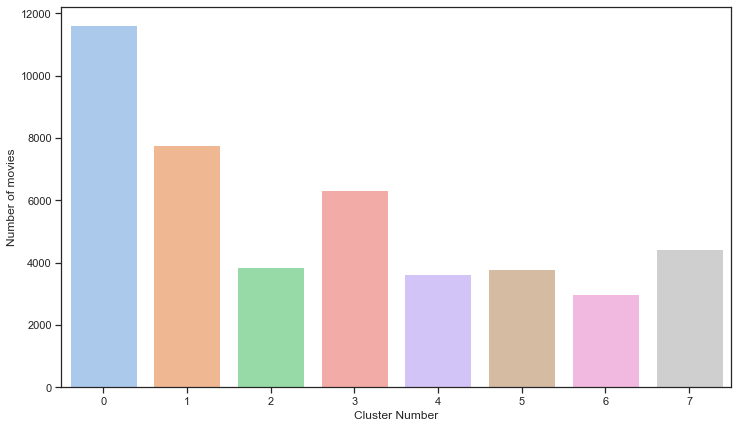

In [266]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,8,1),y=df.groupby(['cluster']).count()['runtime'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [ ]:
df['budget'] = df['budget'].apply(lambda x: float(x))
df['popularity'] = df['popularity'].apply(lambda x: float(x))

#### Runtime

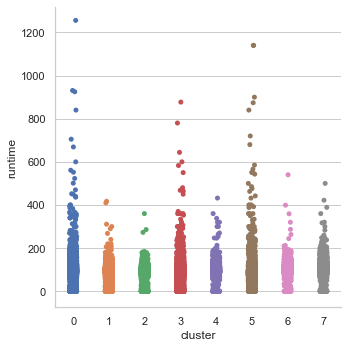

In [315]:
# catplot shows frequencies 
sns.catplot(x="cluster", y="runtime", data=df)

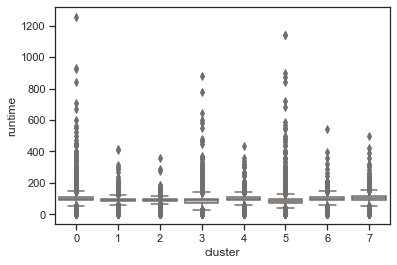

In [294]:
# A boxplot is a standardized way of displaying the distribution of data based on a five number summary 
#(“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). 
#It can tell you about your outliers and what their values are.
sns.boxplot(x="cluster", y="runtime", data=df)

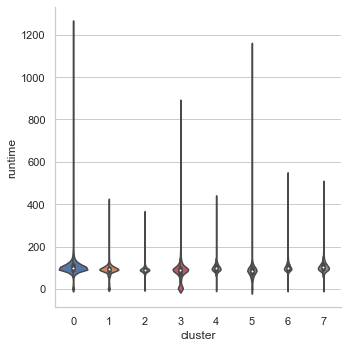

In [334]:
sns.catplot(x="cluster", y="runtime", kind="violin",scale='count', data=df);

#### Revenue

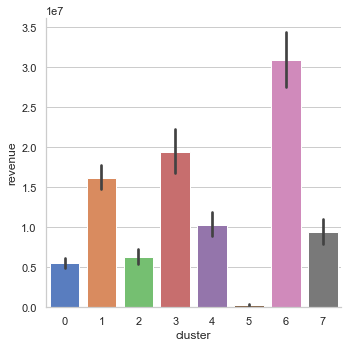

In [386]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="cluster", y="revenue", data=df,kind="bar", palette="muted")


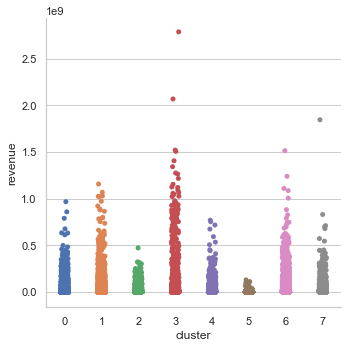

In [314]:
sns.catplot(x="cluster", y="revenue", data=df)

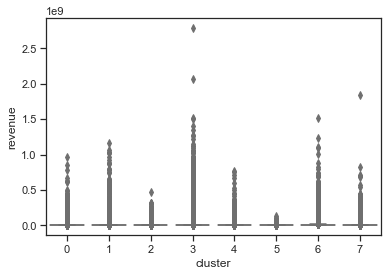

In [295]:
sns.boxplot(x="cluster", y="revenue", data=df)

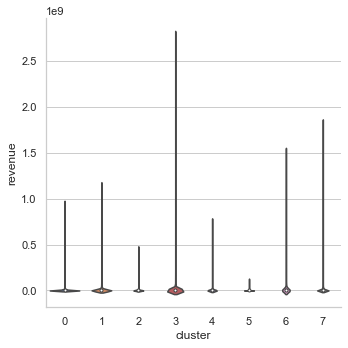

In [323]:
sns.catplot(x="cluster", y="revenue", kind="violin",scale='count', data=df);

#### Vote_average

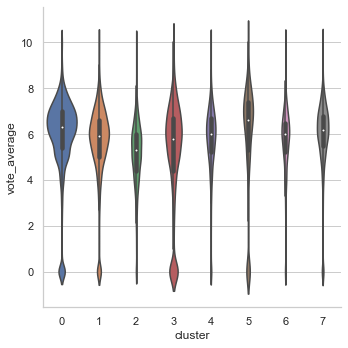

In [320]:
sns.catplot(x="cluster", y="vote_average", kind="violin",scale='count', data=df);

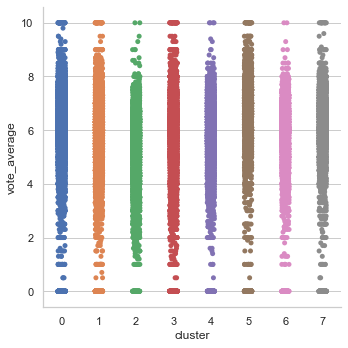

In [313]:
sns.catplot(x="cluster", y="vote_average", data=df)

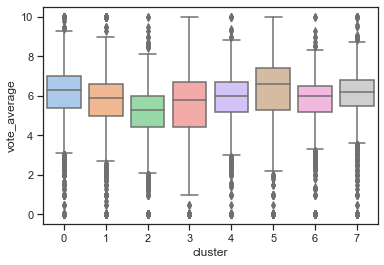

In [296]:
sns.boxplot(x="cluster", y="vote_average", data=df)

#### popularity

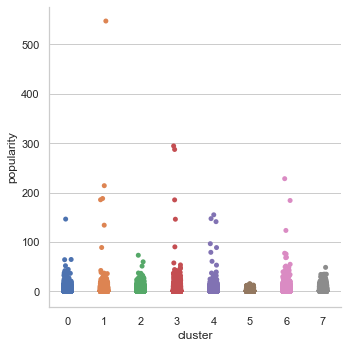

In [316]:
sns.catplot(x="cluster", y="popularity", data=df)

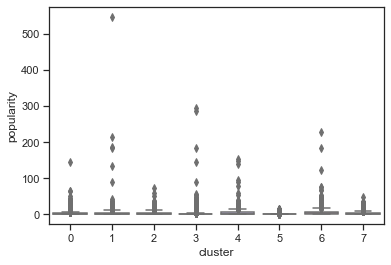

In [309]:
sns.boxplot(x="cluster", y="popularity", data=df)

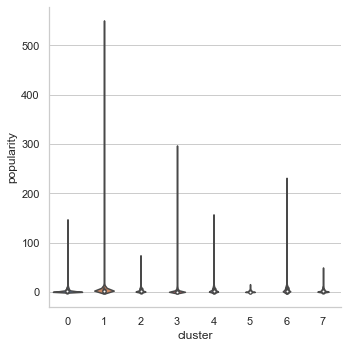

In [324]:
sns.catplot(x="cluster", y="popularity", kind="violin",scale='count', data=df);

#### budget

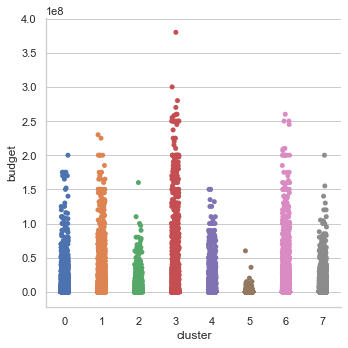

In [317]:
sns.catplot(x="cluster", y="budget", data=df)

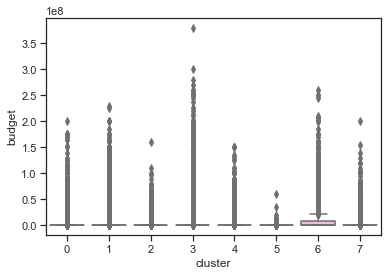

In [310]:
sns.boxplot(x="cluster", y="budget", data=df)

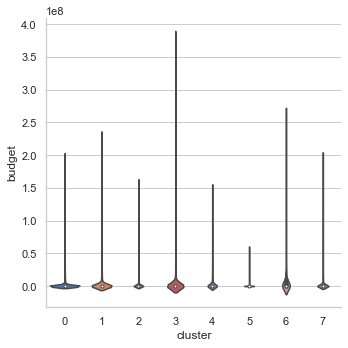

In [321]:
sns.catplot(x="cluster", y="budget", kind="violin",scale='count', data=df);

In [269]:
listToStr = []
for row_index, row in df['genres1'].iteritems():
    aa = ' '.join([str(i) for i in row]) 
    listToStr.append(aa)
    #print(listToStr)
        #names = i['name']
        #genres.append(names)
        #listToStr = ' '.join([str(i) for i in row]) 
   
    #genres1.append(genres)
df.insert(0, "genres_str", listToStr, True) 

### Cluster 0

Let's start investigate clusters

In [339]:
df[df['cluster'] == 0].sample(10)

,genres_str,genres1,budget,original_language,overview,popularity,revenue,runtime,title,video,...,Comedy,Romance,Drama,Documentary,Adventure,Family,Fiction,Horror,Mystery,Crime
28456,Drama Action Western,"[Drama, Action, Western]",0.0,it,Renowned gunman Richard Martin is traveling on...,0.490439,0.0,95.0,Bandidos,False,...,False,False,True,False,False,False,False,False,False,False
3074,Drama Foreign,"[Drama, Foreign]",0.0,en,This thriller investigates the mysterious assa...,0.203067,0.0,112.0,The Quarry,False,...,False,False,True,False,False,False,False,False,False,False
3357,Comedy Drama,"[Comedy, Drama]",0.0,en,The employees of an independent music store le...,7.188728,0.0,90.0,Empire Records,False,...,True,False,True,False,False,False,False,False,False,False
43994,War Fantasy Action Drama,"[War, Fantasy, Action, Drama]",0.0,en,Two young Russian historians are going to Ukra...,1.218959,8910819.0,101.0,We Are from the Future 2,False,...,False,False,True,False,False,False,False,False,False,False
40190,Comedy Drama,"[Comedy, Drama]",0.0,en,"Jacques et Martine, couple de bourgeois ordina...",1.136488,0.0,96.0,Cuisine et dépendances,False,...,True,False,True,False,False,False,False,False,False,False
37304,Drama Foreign,"[Drama, Foreign]",0.0,zh,Family roles and responsibilities are question...,0.102529,0.0,100.0,Warm Spring,False,...,False,False,True,False,False,False,False,False,False,False
23868,Drama,[Drama],0.0,tr,"Aydin, a retired actor, owns a small hotel in ...",11.322080,0.0,196.0,Winter Sleep,False,...,False,False,True,False,False,False,False,False,False,False
17497,Drama,[Drama],0.0,en,"Flashback story of an escape from the lonely, ...",0.465277,0.0,88.0,A Cottage on Dartmoor,False,...,False,False,True,False,False,False,False,False,False,False
22681,Drama Comedy Foreign,"[Drama, Comedy, Foreign]",0.0,sv,"Two very different women, both in their 40s wi...",0.967551,0.0,101.0,Heartbreak Hotel,False,...,True,False,True,False,False,False,False,False,False,False
31704,Comedy Drama,"[Comedy, Drama]",0.0,tr,İskender (Cem Yılmaz) hokkabazdır. Yani aslınd...,1.366833,0.0,122.0,Hokkabaz,False,...,True,False,True,False,False,False,False,False,False,False


After several loads it looks like we have genres: 'Drama', 'Comedy', 'Family', 'Adventure'

In [340]:
keywords_good = ['Drama', 'Comedy', 'Family', 'Adventure']

for key in keywords_good:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.genres_str.str.contains((' ' + str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((' ' + str(key)), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key)), case=False)
df.loc[df['cluster'] == 0][['Drama', 'Comedy', 'Family', 'Adventure']].describe()     

,Drama,Comedy,Family,Adventure
count,11625,11625,11625,11625
unique,1,2,2,2
top,True,False,False,False
freq,11625,9123,10995,11252


In [341]:
df.loc[df['cluster'] == 0].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,year,cluster
count,1.162500e+04,11625.000000,1.162500e+04,11625.000000,11625.000000,11625.000000,11625.000000,11625.0
mean,2.480509e+06,2.579698,5.566358e+06,102.900903,5.926443,76.909505,1990.320000,0.0
std,1.065912e+07,3.910763,3.362062e+07,37.687019,1.786682,368.227611,24.901723,0.0
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1893.000000,0.0
25%,0.000000e+00,0.422303,0.000000e+00,90.000000,5.400000,3.000000,1974.000000,0.0
50%,0.000000e+00,1.095033,0.000000e+00,100.000000,6.300000,9.000000,2000.000000,0.0
75%,0.000000e+00,3.124151,0.000000e+00,113.000000,7.000000,28.000000,2010.000000,0.0
max,2.000000e+08,146.161786,9.665506e+08,1256.000000,10.000000,11187.000000,2018.000000,0.0


We can say cluster 0 is 'Drama', 'Family', 'Adventure' genre with long runtime 

### Cluster 1

In [344]:
df[df['cluster'] == 1].sample(10)

,genres_str,genres1,budget,original_language,overview,popularity,revenue,runtime,title,video,...,Comedy,Romance,Drama,Documentary,Adventure,Family,Fiction,Horror,Mystery,Crime
10362,Action Comedy Western,"[Action, Comedy, Western]",0.0,it,Arms dealer Yolaf Peterson aims to make a sale...,2.446983,0.0,118.0,Companeros,False,...,True,False,False,False,False,False,False,False,False,False
408,Comedy Crime Music,"[Comedy, Crime, Music]",0.0,en,The Lone Rangers have heavy-metal dreams and a...,7.092320,0.0,92.0,Airheads,False,...,True,False,False,False,False,False,False,False,False,True
2684,Comedy,[Comedy],0.0,en,"Junior and his father, Ben, move from Cold Riv...",8.142992,0.0,90.0,Problem Child 2,False,...,True,False,False,False,False,False,False,False,False,False
42276,Comedy,[Comedy],0.0,en,When Buster's girlfriend falls for a trapeze a...,0.041806,0.0,21.0,Allez Oop,False,...,True,False,False,False,False,False,False,False,False,False
45196,Comedy,[Comedy],0.0,en,"Superstar comedian/writer Bill Maher, one of t...",0.633204,0.0,60.0,Bill Maher: The Decider,False,...,True,False,False,False,False,False,False,False,False,False
19857,Action Adventure Animation Comedy Science Fiction,"[Action, Adventure, Animation, Comedy, Science...",0.0,en,A Danish crew of misfits travel to Saturn in s...,2.142391,0.0,90.0,Journey to Saturn,False,...,True,False,False,False,True,False,True,False,False,False
6662,Comedy,[Comedy],9000000.0,en,Nervous high school senior Tom Lawrence visits...,8.888278,4350774.0,79.0,PCU,False,...,True,False,False,False,False,False,False,False,False,False
30954,TV Movie Adventure Comedy Family,"[TV Movie, Adventure, Comedy, Family]",0.0,en,A teen learns that his birth mother is a merma...,1.265599,0.0,95.0,The Thirteenth Year,False,...,True,False,False,False,True,True,False,False,False,False
41884,Comedy Family,"[Comedy, Family]",0.0,en,Teddy Duncan's middle-class family embarks on ...,4.708525,0.0,85.0,"Good Luck Charlie, It's Christmas!",False,...,True,False,False,False,False,True,False,False,False,False
16915,Comedy,[Comedy],0.0,tr,Shaban is Ramadan's best friend whom he met wh...,0.626525,0.0,80.0,Milk Brothers,False,...,True,False,False,False,False,False,False,False,False,False


In [345]:
keywords_good = ['Comedy', 'Romance', 'Family']

for key in keywords_good:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.genres_str.str.contains((' ' + str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((' ' + str(key)), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key)), case=False)
df.loc[df['cluster'] == 1][['Comedy', 'Romance', 'Family']].describe()  

,Comedy,Romance,Family
count,7759,7759,7759
unique,1,2,2
top,True,False,False
freq,7759,6095,6863


In [349]:
df.loc[df['cluster'] == 1].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,year,cluster
count,7.759000e+03,7759.000000,7.759000e+03,7759.000000,7759.000000,7759.000000,7759.000000,7759.0
mean,5.501058e+06,3.286732,1.620966e+07,88.778966,5.611819,121.769945,1990.312927,1.0
std,1.862199e+07,8.426861,6.922115e+07,27.412896,1.739525,437.067264,25.191553,0.0
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1890.000000,1.0
25%,0.000000e+00,0.494269,0.000000e+00,84.000000,5.000000,4.000000,1977.000000,1.0
50%,0.000000e+00,1.318752,0.000000e+00,92.000000,5.900000,12.000000,1999.000000,1.0
75%,0.000000e+00,4.667194,0.000000e+00,101.000000,6.600000,48.000000,2010.000000,1.0
max,2.300000e+08,547.488298,1.156731e+09,417.000000,10.000000,11444.000000,2018.000000,1.0


We can say cluster 1 has 'Comedy', 'Romance', 'Family' genres and the highest popularity

### Cluster 2

In [352]:
df[df['cluster'] == 2].sample(10)

,genres_str,genres1,budget,original_language,overview,popularity,revenue,runtime,title,video,...,Comedy,Romance,Drama,Documentary,Adventure,Family,Fiction,Horror,Mystery,Crime
14766,Horror,[Horror],0.0,en,A group of college students are led by their p...,0.146623,0.0,86.0,Shriek of the Mutilated,False,...,False,False,False,False,False,False,False,True,False,False
33966,Horror,[Horror],0.0,es,The legendary Loreley has been living for cent...,0.337601,0.0,85.0,The Loreley's Grasp,False,...,False,False,False,False,False,False,False,True,False,False
44266,Horror Science Fiction,"[Horror, Science Fiction]",0.0,en,"Professor ""Johnny Longbow"" Salina, a man who r...",0.429003,0.0,90.0,Track of the Moon Beast,False,...,False,False,False,False,False,False,True,True,False,False
24015,Horror Thriller,"[Horror, Thriller]",5000000.0,en,When a team of explorers ventures into the cat...,10.846585,40100000.0,93.0,"As Above, So Below",False,...,False,False,False,False,False,False,False,True,False,False
8709,Thriller Horror Science Fiction,"[Thriller, Horror, Science Fiction]",0.0,en,Arizona ants mock the food chain on their way ...,3.194233,0.0,86.0,Phase IV,False,...,False,False,False,False,False,False,True,True,False,False
25722,Thriller Horror,"[Thriller, Horror]",0.0,en,"Based on an ancient Scottish folk song, an old...",0.912847,0.0,106.0,The Devil's Widow,False,...,False,False,False,False,False,False,False,True,False,False
35710,Horror,[Horror],0.0,en,An American family moves to Mexico to fabricat...,1.686426,0.0,93.0,Dolly Dearest,False,...,False,False,False,False,False,False,False,True,False,False
28452,Horror,[Horror],0.0,en,The titular medallion is a gift presented to y...,0.492197,0.0,90.0,The Night Child,False,...,False,False,False,False,False,False,False,True,False,False
24691,Horror,[Horror],0.0,en,Six people are brought together at the funeral...,7.621915,0.0,80.0,Crazy Eights,False,...,False,False,False,False,False,False,False,True,False,False
21044,Horror Action,"[Horror, Action]",0.0,en,"In 17th century China, zombies and vampires ro...",0.512034,0.0,112.0,The Era of Vampires,False,...,False,False,False,False,False,False,False,True,False,False


In [353]:
keywords_good = ['Horror', 'Thriller']

for key in keywords_good:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.genres_str.str.contains((' ' + str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((' ' + str(key)), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key)), case=False)

df.loc[df['cluster'] == 2][['Horror', 'Thriller']].describe()    

,Horror,Thriller
count,3852,3852
unique,1,2
top,True,False
freq,3852,2372


In [354]:
df.loc[df['cluster'] == 2].describe()    

,budget,popularity,revenue,runtime,vote_average,vote_count,year,cluster
count,3.852000e+03,3852.000000,3.852000e+03,3852.000000,3852.000000,3852.000000,3852.000000,3852.0
mean,2.335346e+06,3.523316,6.270598e+06,88.692887,5.149013,98.590343,1994.503894,2.0
std,8.604846e+06,4.342198,2.785379e+07,20.721419,1.355620,291.514976,20.264474,0.0
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1896.000000,2.0
25%,0.000000e+00,0.739583,0.000000e+00,84.000000,4.400000,8.000000,1981.000000,2.0
50%,0.000000e+00,1.803266,0.000000e+00,90.000000,5.300000,18.000000,2002.000000,2.0
75%,6.537500e+04,5.126440,0.000000e+00,96.000000,6.000000,55.250000,2011.000000,2.0
max,1.600000e+08,72.884078,4.706540e+08,360.000000,10.000000,4564.000000,2017.000000,2.0


Cluster 2 has 'Horror' ('Thriller') genre with long runtime and average budget (2.3M) revenue (11M)

### Cluster 3

In [357]:
df[df['cluster'] == 3].sample(10)

,genres_str,genres1,budget,original_language,overview,popularity,revenue,runtime,title,video,...,Comedy,Romance,Drama,Documentary,Adventure,Family,Fiction,Horror,Mystery,Crime
38670,Action Science Fiction,"[Action, Science Fiction]",0.0,en,Eric is a secret agent currently working as se...,1.145830,0.0,91.0,CyberTracker,False,...,False,False,False,False,False,False,True,False,False,False
39162,Action,[Action],0.0,en,Former SWAT leader David Hendrix and hard-part...,3.195629,0.0,114.0,Gridlocked,False,...,False,False,False,False,False,False,False,False,False,False
38568,Science Fiction,[Science Fiction],0.0,en,Buck Rogers and Buddy Wade are in the middle o...,0.797124,0.0,237.0,Buck Rogers,False,...,False,False,False,False,False,False,True,False,False,False
20046,,[],0.0,en,Rock concert at the famous Red Rocks featuring...,0.341085,0.0,60.0,Stevie Nicks: Live at Red Rocks,False,...,False,False,False,False,False,False,False,False,False,False
24494,TV Movie History War,"[TV Movie, History, War]",0.0,de,A group of German boys is ordered to protect a...,1.025976,0.0,100.0,The Bridge,False,...,False,False,False,False,False,False,False,False,False,False
36833,,[],0.0,en,"Two boys, Li Ahh and Li Ohm, grow up motherles...",0.054363,0.0,0.0,Flower in the Pocket,False,...,False,False,False,False,False,False,False,False,False,False
22969,Action Foreign,"[Action, Foreign]",0.0,it,Priest turned vigilante Father John (Van Cleef...,0.260415,0.0,94.0,God's Gun,False,...,False,False,False,False,False,False,False,False,False,False
4096,War,[War],68000000.0,en,Enemy at the Gates is a war film from Jean-Jac...,10.704813,96976270.0,131.0,Enemy at the Gates,False,...,False,False,False,False,False,False,False,False,False,False
38593,,[],0.0,en,"Hilda, the new housemaid, brings about an awak...",0.214223,0.0,100.0,I've Never Had an Hilda,False,...,False,False,False,False,False,False,False,False,False,False
44095,Family Fantasy,"[Family, Fantasy]",0.0,en,Santa Claus has a mission to convince three pr...,0.697003,0.0,87.0,Cancel Christmas,False,...,False,False,False,False,False,True,False,False,False,False


In [362]:
keywords_good = ['Adventure', 'Action', 'Science']

for key in keywords_good:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.genres_str.str.contains((' ' + str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((' ' + str(key)), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key)), case=False)

df.loc[df['cluster'] == 3][['Adventure', 'Action', 'Science']].describe()    

,Adventure,Action,Science
count,6332,6332,6332
unique,2,2,2
top,False,False,False
freq,5077,4859,5451


In [330]:
df.loc[df['cluster'] == 3].describe()    

,budget,popularity,revenue,runtime,vote_average,vote_count,year,cluster
count,6.332000e+03,6332.000000,6.332000e+03,6332.000000,6332.000000,6332.000000,6332.000000,6332.0
mean,6.232664e+06,2.480039,1.935651e+07,82.640398,5.063392,150.076121,1987.204043,3.0
std,2.789405e+07,7.528650,1.147194e+08,47.876665,2.425606,768.046635,25.615692,0.0
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1890.000000,3.0
25%,0.000000e+00,0.135271,0.000000e+00,71.000000,4.400000,1.000000,1970.000000,3.0
50%,0.000000e+00,0.628593,0.000000e+00,90.000000,5.800000,5.000000,1995.000000,3.0
75%,0.000000e+00,1.989869,0.000000e+00,100.000000,6.700000,17.000000,2009.000000,3.0
max,3.800000e+08,294.337037,2.787965e+09,877.000000,10.000000,12114.000000,2020.000000,3.0


Cluster 3 has 'Adventure', 'Science' genre, hight budget (6M), highest revenue (19M) the most voted movies

### Cluster 4

In [364]:
df[df['cluster'] == 4].sample(10)

,genres_str,genres1,budget,original_language,overview,popularity,revenue,runtime,title,video,...,Drama,Documentary,Adventure,Family,Fiction,Horror,Mystery,Crime,,Science
15385,Crime Drama Thriller,"[Crime, Drama, Thriller]",13000000.0,en,Deputy Sheriff Lou Ford is a pillar of the com...,6.324751,0.0,109.0,The Killer Inside Me,False,...,True,False,False,False,False,False,False,True,True,False
41331,Thriller Drama,"[Thriller, Drama]",0.0,ja,"One afternoon, Shiori, a very sexually active ...",1.726630,0.0,77.0,Wet Woman in the Wind,False,...,True,False,False,False,False,False,False,False,True,False
17750,Drama Thriller Science Fiction,"[Drama, Thriller, Science Fiction]",60000000.0,en,As an epidemic of a lethal airborne virus - th...,8.244359,137551594.0,106.0,Contagion,False,...,True,False,False,False,True,False,False,False,True,True
19629,Horror Drama Thriller,"[Horror, Drama, Thriller]",0.0,en,"Unemployed and unemployable, Tony is a sympath...",3.233040,0.0,76.0,Tony,False,...,True,False,False,False,False,True,False,False,True,False
27345,Thriller Crime Drama Mystery,"[Thriller, Crime, Drama, Mystery]",0.0,en,"Johnny Scardino is working for blackmailers, p...",0.441113,0.0,96.0,Johnny Skidmarks,False,...,True,False,False,False,False,False,True,True,True,False
39636,Crime Drama Mystery Thriller,"[Crime, Drama, Mystery, Thriller]",0.0,hi,A British woman faces challenges while attempt...,0.823333,0.0,103.0,That Girl in Yellow Boots,False,...,True,False,False,False,False,False,True,True,True,False
28649,Thriller Horror Drama,"[Thriller, Horror, Drama]",8000.0,en,Marty is the ideal fifth grader. He gets good ...,1.747257,0.0,105.0,Found,False,...,True,False,False,False,False,True,False,False,True,False
1207,Crime Drama Mystery Thriller,"[Crime, Drama, Mystery, Thriller]",6000000.0,en,Private eye Jake Gittes lives off the murky mo...,12.292270,30000000.0,130.0,Chinatown,False,...,True,False,False,False,False,False,True,True,True,False
34295,Crime Mystery Thriller,"[Crime, Mystery, Thriller]",0.0,ab,Taking place almost entirely over the course o...,0.001202,0.0,104.0,Coincidence,False,...,False,False,False,False,False,False,True,True,True,False
20410,Thriller Crime Drama,"[Thriller, Crime, Drama]",30000000.0,en,A woman turns to prescription medication as a ...,11.645847,63372757.0,106.0,Side Effects,False,...,True,False,False,False,False,False,False,True,True,False


In [365]:
keywords_good = ['Horror', 'Drama', 'Thriller', 'Mystery', 'Crime']

for key in keywords_good:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.genres_str.str.contains((' ' + str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((' ' + str(key)), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key)), case=False)

df.loc[df['cluster'] == 4][['Horror', 'Drama', 'Thriller', 'Mystery', 'Crime']].describe()    

,Horror,Drama,Thriller,Mystery,Crime
count,3624,3624,3624,3624,3624
unique,2,2,1,2,2
top,False,True,True,False,False
freq,3246,2374,3624,2632,2483


In [366]:
df.loc[df['cluster'] == 4].describe()   

,budget,popularity,revenue,runtime,vote_average,vote_count,year,cluster
count,3.624000e+03,3624.000000,3.624000e+03,3624.000000,3624.000000,3624.000000,3624.000000,3624.0
mean,4.813297e+06,4.079819,1.032949e+07,99.863687,5.762969,148.951159,1994.961645,4.0
std,1.444169e+07,6.569825,4.631621e+07,26.032521,1.455479,517.199974,22.365516,0.0
min,0.000000e+00,0.000001,0.000000e+00,0.000000,0.000000,0.000000,1920.000000,4.0
25%,0.000000e+00,0.756580,0.000000e+00,90.000000,5.200000,5.000000,1983.000000,4.0
50%,0.000000e+00,1.943030,0.000000e+00,98.000000,6.000000,16.000000,2004.000000,4.0
75%,1.470000e+05,6.107423,0.000000e+00,110.000000,6.700000,70.000000,2012.000000,4.0
max,1.500000e+08,154.801009,7.678205e+08,432.000000,10.000000,8670.000000,2017.000000,4.0


Cluster 4 has 'Horror' and 'thriller' genre, everithing is very average

### Cluster 5

In [368]:
df[df['cluster'] == 5].sample(20)

,genres_str,genres1,budget,original_language,overview,popularity,revenue,runtime,title,video,...,Drama,Documentary,Adventure,Family,Fiction,Horror,Mystery,Crime,,Science
6168,Music Documentary,"[Music, Documentary]",0.0,en,A documentary by photographer Sam Jones docume...,0.998704,0.0,92.0,I Am Trying to Break Your Heart,False,...,False,True,False,False,False,False,False,False,True,False
18810,Documentary,[Documentary],0.0,ms,"A portrait of village life in South Thailand, ...",0.038824,0.0,72.0,Village People Radio Show,False,...,False,True,False,False,False,False,False,False,True,False
20243,Documentary,[Documentary],0.0,en,A new feature documentary from Metro-Goldwyn-M...,1.994560,0.0,98.0,Everything or Nothing,False,...,False,True,False,False,False,False,False,False,True,False
19038,Comedy Documentary,"[Comedy, Documentary]",0.0,en,A documentary on Phil Rosenthal's experiences ...,0.285420,0.0,86.0,Exporting Raymond,False,...,False,True,False,False,False,False,False,False,True,False
40095,Documentary,[Documentary],0.0,nl,"In 2016, the Noordbrabants Museum in the Dutch...",0.089967,0.0,86.0,Hieronymus Bosch: Touched by the Devil,False,...,False,True,False,False,False,False,False,False,True,False
12901,Documentary,[Documentary],0.0,en,Through a focus on the life of Dalton Trumbo (...,1.666664,0.0,96.0,Trumbo,False,...,False,True,False,False,False,False,False,False,True,False
27713,Documentary Thriller,"[Documentary, Thriller]",0.0,pt,"Part memoir, part city symphony, part noir-ish...",0.368635,0.0,85.0,The Last Time I Saw Macao,False,...,False,True,False,False,False,False,False,False,True,False
34398,War Documentary,"[War, Documentary]",0.0,en,A contemplative portrait of Ron 'Stray Dog' Ha...,0.088117,0.0,98.0,Stray Dog,False,...,False,True,False,False,False,False,False,False,True,False
24012,Documentary,[Documentary],0.0,en,America's 50-million strong Evangelical commun...,0.156913,0.0,74.0,Waiting for Armageddon,False,...,False,True,False,False,False,False,False,False,True,False
45214,Documentary,[Documentary],0.0,en,The 2016 Reebok CrossFit Games were a grueling...,0.867259,0.0,116.0,Fittest On Earth: A Decade Of Fitness,False,...,False,True,False,False,False,False,False,False,True,False


In [369]:
keywords_good = ['Documentary']

for key in keywords_good:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.genres_str.str.contains((' ' + str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((' ' + str(key)), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key)), case=False)

df.loc[df['cluster'] == 5][['Documentary']].describe()    

,Documentary
count,3805
unique,1
top,True
freq,3805


In [371]:
df[df['cluster'] == 5].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,year,cluster
count,3.805000e+03,3805.000000,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3805.0
mean,1.116681e+05,0.944163,3.234662e+05,87.697766,5.848962,12.571353,2002.624179,5.0
std,1.380270e+06,1.639957,4.238150e+06,57.173377,2.511080,31.841112,19.371259,0.0
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,5.0
25%,0.000000e+00,0.102116,0.000000e+00,74.000000,5.300000,1.000000,2002.000000,5.0
50%,0.000000e+00,0.385288,0.000000e+00,87.000000,6.600000,4.000000,2009.000000,5.0
75%,0.000000e+00,1.030773,0.000000e+00,97.000000,7.400000,10.000000,2013.000000,5.0
max,6.000000e+07,15.303260,1.273922e+08,1140.000000,10.000000,516.000000,2017.000000,5.0


Documentary movies with low popularity

### Cluster 6

In [377]:
df[df['cluster'] == 6].sample(10)

,genres_str,genres1,budget,original_language,overview,popularity,revenue,runtime,title,video,...,Drama,Documentary,Adventure,Family,Fiction,Horror,Mystery,Crime,,Science
167,Action Crime Thriller Drama,"[Action, Crime, Thriller, Drama]",20000000.0,en,"Along with his new friends, a teenager who was...",14.810519,7563728.0,107.0,Hackers,False,...,True,False,False,False,False,False,False,True,True,False
3433,Action Drama Thriller War,"[Action, Drama, Thriller, War]",62000000.0,en,"In the midst of World War II, the battle under...",7.879924,127666415.0,116.0,U-571,False,...,True,False,False,False,False,False,False,False,True,False
11882,Drama Action Thriller Crime Mystery War,"[Drama, Action, Thriller, Crime, Mystery, War]",0.0,en,The murder of a prostitute in Nazi occupied Wa...,12.061386,0.0,148.0,The Night of the Generals,False,...,True,False,False,False,False,False,True,True,True,False
29575,Action Drama Thriller,"[Action, Drama, Thriller]",110000000.0,en,In the aftermath of a massive earthquake in Ca...,20.547925,470490832.0,114.0,San Andreas,False,...,True,False,False,False,False,False,False,False,True,False
16811,Drama Action Crime,"[Drama, Action, Crime]",0.0,pt,After a bloody invasion of the BOPE in the Hig...,12.334357,63027681.0,115.0,Elite Squad: The Enemy Within,False,...,True,False,False,False,False,False,False,True,True,False
11272,Action Crime Thriller Drama,"[Action, Crime, Thriller, Drama]",1549000.0,cn,"After winning his first competition, Takumi fo...",4.331811,7096000.0,107.0,Initial D,False,...,True,False,False,False,False,False,False,True,True,False
14894,War Action Adventure Drama Thriller,"[War, Action, Adventure, Drama, Thriller]",100000000.0,en,During the U.S.-led occupation of Baghdad in 2...,11.174041,94882889.0,115.0,Green Zone,False,...,True,False,True,False,False,False,False,False,True,False
38524,Action Drama Mystery Thriller,"[Action, Drama, Mystery, Thriller]",3200000.0,ta,The film's story is around a rich business ent...,0.802284,0.0,150.0,Ghajini,False,...,True,False,False,False,False,False,True,False,True,False
18301,Comedy Thriller Action Drama,"[Comedy, Thriller, Action, Drama]",8000000.0,en,Set in the world of mega-churches in which a f...,3.033375,0.0,96.0,Salvation Boulevard,False,...,True,False,False,False,False,False,False,False,True,False
3441,Action Science Fiction Thriller,"[Action, Science Fiction, Thriller]",10000000.0,en,Alex Corvis returns to the world of the living...,6.311201,0.0,102.0,The Crow: Salvation,False,...,False,False,False,False,True,False,False,False,True,True


In [379]:
keywords_good = ['Horror', 'Thriller', 'Action', 'Adventure', 'Crime', 'Drama']

for key in keywords_good:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.genres_str.str.contains((' ' + str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((' ' + str(key)), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key)), case=False)

df.loc[df['cluster'] == 6][['Horror', 'Thriller', 'Action', 'Adventure', 'Crime', 'Drama']].describe()    

,Horror,Thriller,Action,Adventure,Crime,Drama
count,2978,2978,2978,2978,2978,2978
unique,2,2,1,2,2,2
top,False,True,True,False,False,False
freq,2911,2209,2978,2163,1781,1514


In [380]:
df.loc[df['cluster'] == 6].describe()    

,budget,popularity,revenue,runtime,vote_average,vote_count,year,cluster
count,2.978000e+03,2978.000000,2.978000e+03,2978.000000,2978.000000,2978.000000,2978.000000,2978.0
mean,1.296831e+07,5.181260,3.084159e+07,103.053727,5.684587,275.641706,1995.144056,6.0
std,3.067165e+07,8.222442,9.929988e+07,26.935605,1.417455,848.992864,18.602603,0.0
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1900.000000,6.0
25%,0.000000e+00,0.971192,0.000000e+00,91.000000,5.200000,8.000000,1985.000000,6.0
50%,0.000000e+00,2.821694,0.000000e+00,100.000000,6.000000,24.000000,2001.000000,6.0
75%,8.500000e+06,7.761998,5.692448e+06,113.000000,6.500000,116.000000,2009.000000,6.0
max,2.600000e+08,228.032744,1.513529e+09,540.000000,10.000000,14075.000000,2018.000000,6.0


Looks like cluster 6 is 'Horror', 'Thriller', 'Action' with high budget and high revenue, long runtime, high popularity

### Cluster 7

In [382]:
df[df['cluster'] == 7].sample(10)

,genres_str,genres1,budget,original_language,overview,popularity,revenue,runtime,title,video,...,Drama,Documentary,Adventure,Family,Fiction,Horror,Mystery,Crime,,Science
15409,Comedy Drama Romance,"[Comedy, Drama, Romance]",15000000.0,en,A car magnate watches his personal and profess...,5.829644,5024782.0,90.0,Solitary Man,False,...,True,False,False,False,False,False,False,False,True,False
3165,Drama Romance Comedy,"[Drama, Romance, Comedy]",0.0,en,Depressed and jaded after being dumped by her ...,2.096508,0.0,115.0,Minnie and Moskowitz,False,...,True,False,False,False,False,False,False,False,True,False
20414,Drama Foreign Romance,"[Drama, Foreign, Romance]",0.0,en,"Two complete strangers, ANNA and STEPHEN, are ...",1.244581,0.0,110.0,The Waiting Room,False,...,True,False,False,False,False,False,False,False,True,False
6627,Adventure Drama Music Romance,"[Adventure, Drama, Music, Romance]",5200000.0,hi,Lagaan tells the tale of the Indian village Ch...,4.974510,8100000.0,224.0,Lagaan: Once Upon a Time in India,False,...,True,False,True,False,False,False,False,False,True,False
35805,Drama Romance,"[Drama, Romance]",0.0,nl,The Girl and Death tells us the impossible lov...,0.505235,0.0,127.0,The Girl and Death,False,...,True,False,False,False,False,False,False,False,True,False
38768,TV Movie Romance,"[TV Movie, Romance]",0.0,en,A famous country singer set to marry a glamoro...,0.566128,0.0,84.0,A Country Wedding,False,...,False,False,False,False,False,False,False,False,True,False
29231,Drama Horror Romance,"[Drama, Horror, Romance]",0.0,en,A crippled puppeteer rescues an abused young b...,0.979796,0.0,81.0,The Mad Genius,False,...,True,False,False,False,False,True,False,False,True,False
14288,Romance Drama Fantasy,"[Romance, Drama, Fantasy]",0.0,en,"India, 1937. Anne-Marie Stretter is the wife o...",0.675717,0.0,120.0,India Song,False,...,True,False,False,False,False,False,False,False,True,False
13692,Comedy Drama Romance,"[Comedy, Drama, Romance]",0.0,en,A traveling art saleswoman tries to shake off ...,12.459106,2434658.0,94.0,Management,False,...,True,False,False,False,False,False,False,False,True,False
40840,Romance,[Romance],0.0,en,"A bodyguard must go undercover to protect, a t...",3.877286,0.0,92.0,Undercover Bridesmaid,False,...,False,False,False,False,False,False,False,False,True,False


In [383]:
keywords_good = ['Comedy', 'Drama', 'Romance']

for key in keywords_good:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.genres_str.str.contains((' ' + str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key) + ' '), case=False)
    df[str(key)] = df.genres_str.str.contains((' ' + str(key)), case=False)
    df[str(key)] = df.genres_str.str.contains((str(key)), case=False)

df.loc[df['cluster'] == 7][['Comedy', 'Drama', 'Romance']].describe()    

,Comedy,Drama,Romance
count,4450,4450,4450
unique,2,2,1
top,False,True,True
freq,3067,4284,4450


In [384]:
df.loc[df['cluster'] == 7].describe()    

,budget,popularity,revenue,runtime,vote_average,vote_count,year,cluster
count,4.450000e+03,4450.000000,4.450000e+03,4450.000000,4450.000000,4450.000000,4450.000000,4450.0
mean,3.460729e+06,3.072249,9.389889e+06,105.535056,5.920674,92.109438,1988.422921,7.0
std,1.174923e+07,3.813976,5.084238e+07,29.227435,1.594574,359.170264,25.779177,0.0
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1896.000000,7.0
25%,0.000000e+00,0.587384,0.000000e+00,92.000000,5.500000,4.000000,1972.000000,7.0
50%,0.000000e+00,1.468250,0.000000e+00,102.000000,6.200000,12.000000,1999.000000,7.0
75%,0.000000e+00,4.429969,0.000000e+00,116.000000,6.800000,39.000000,2008.000000,7.0
max,2.000000e+08,48.307194,1.845034e+09,500.000000,10.000000,8147.000000,2018.000000,7.0


Cluster 7 is 'Drama', 'Romance' with low budget nut average revenue

# Conclusion

I was able to use only 2 clustering methods due to computational machine abilities. The K-means method has shown the best performance. I identified 8 different clusters for my dataset.
Analyzing my clusters I was able to find some insights:
- cluster 0 - We can say cluster 0 is 'Drama', 'Family', 'Adventure' genre with long runtime 
- cluster 1 -  'Comedy', 'Romance', 'Family' movies with the highest popularity
- cluster 2 -  Cluster 2 has 'Horror' ('Thriller') genre with long runtime and average budget (2.3M) revenue (11M)
- cluster 3 - Cluster 3 has 'Adventure',  'Science' genres, hight budget (6M), highest revenue (19M) the most voted movies
- cluster 4 -  medium budget "everything else"
- cluster 5 - Documentary movies with low popularity, lowest revenue, lower budget, long runtime
- cluster 6 -  'Horror', 'Thriller', 'Action' with high budget and highest revenue, long runtime, high popularity
- cluster 7 -  'Drama', 'Romance' with a low budget and average revenue

### Next steps:

We can use this information trying to predict movie revenue or to build recomendation system. We also can gain more information like Cast and Crew.